# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [28]:
#dependencies
import requests
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import scipy.stats as sts
import time


from pprint import pprint
from config import api_key
from citipy import citipy

#print(api_key)

## Generate Cities List

In [47]:
# generate cities as needed 
import random

lat = []
long = []

for x in range(1500):
    lat.append(round(random.uniform(-90,90),2))
    long.append(round(random.uniform(-180,180),2))

city_loc_df = {
    "lat" : lat,
    "long" : long
}

city_df = pd.DataFrame(city_loc_df)

city_df.head()
len(city_df)


1500

In [48]:
#convert random lat and Long into city names via citipy nearest_city
from citipy import citipy

city_name =[]
city_country = []


for row in range(len(city_df)):
    lati = city_df['lat'][row]
    longi =city_df['long'][row]
    
    city = citipy.nearest_city(lati,longi)
    
    if city.city_name not in city_name:
    
        city_name.append(city.city_name)
        city_country.append(city.country_code)
        
print(len(city_name), len(city_country))        

data = {'Name': city_name, 'Country': city_country}

city_df = pd.DataFrame(data)
city_df

596 596


,Name,Country
0,goundam,ml
1,praia da vitoria,pt
2,oboyan,ru
3,alofi,nu
4,bur gabo,so
...,...,...
591,corbelia,br
592,portovelo,ec
593,tilichiki,ru
594,darhan,mn


In [ ]:
# more than 500 unique cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [49]:
#take city data and use Google API to find city data

#url basic point  api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
url = f'api.openweathermap.org/data/2.5/weather?q='
key = api_key

# lists to store the data from the api calls
max_temp =[]
humidity = []
cloudiness = []
wind_speed = []
date_rec = []
real_lat = []
real_long = []

# api call and data pulls
for row in range(len(city_df)):
   
    city_qname =  city_df['Name'][row] 
    query_url = f'http://{url}{city_qname}&units=imperial&appid={key}'
    time.sleep(1)
    try:
        data = requests.get(query_url).json()
        #print(city_name[row], max_temp, humidity, cloudiness, wind_speed)
        #pprint(data)
        max_temp.append(float(data['main']['temp_max']))
        humidity.append(float(data['main']['humidity']))
        cloudiness.append(float(data['clouds']['all']))
        wind_speed.append(float(data['wind']['speed']))
        real_lat.append(float(data['coord']['lat']))
        real_long.append(float(data['coord']['lon']))
        date_rec.append(int(data['dt']))
        print(f'Successful request {row}: for city {city_qname}')
    except: 
        print(f'Unsuccessful request {row}: for city {city_qname}')
        max_temp.append("NA")
        humidity.append("NA")
        cloudiness.append("NA")
        wind_speed.append("NA")
        real_lat.append("NA")
        real_long.append("NA")
        date_rec.append("NA")
        
city_df['Max temp'] = max_temp
city_df['Humidity'] = humidity        
city_df['Cloudiness'] = cloudiness    
city_df['Wind Speed'] = wind_speed 
city_df['Real Lat'] = real_lat 
city_df['Real Long'] = real_long
city_df['Date Rec'] = date_rec  




Successful request 0: for city goundam
Successful request 1: for city praia da vitoria
Successful request 2: for city oboyan
Successful request 3: for city alofi
Unsuccessful request 4: for city bur gabo
Successful request 5: for city uyemskiy
Successful request 6: for city khatanga
Successful request 7: for city aklavik
Successful request 8: for city butaritari
Successful request 9: for city caravelas
Successful request 10: for city salalah
Successful request 11: for city hermanus
Successful request 12: for city tabuk
Successful request 13: for city talnakh
Successful request 14: for city hithadhoo
Successful request 15: for city itapirapua
Successful request 16: for city vaini
Successful request 17: for city lensk
Successful request 18: for city srivardhan
Successful request 19: for city rancho veloz
Successful request 20: for city bafia
Successful request 21: for city pecos
Successful request 22: for city punta arenas
Successful request 23: for city lebu
Successful request 24: for c

Successful request 195: for city cidreira
Successful request 196: for city geraldton
Successful request 197: for city kudahuvadhoo
Successful request 198: for city nome
Successful request 199: for city jamestown
Successful request 200: for city george
Successful request 201: for city maceio
Successful request 202: for city puerto del rosario
Successful request 203: for city ostrovnoy
Successful request 204: for city nuuk
Unsuccessful request 205: for city andselv
Successful request 206: for city athabasca
Successful request 207: for city kautokeino
Successful request 208: for city jardim
Successful request 209: for city kasumkent
Successful request 210: for city bonoua
Successful request 211: for city margate
Successful request 212: for city nabire
Successful request 213: for city sechura
Successful request 214: for city ambon
Unsuccessful request 215: for city tsihombe
Successful request 216: for city cabo san lucas
Successful request 217: for city walvis bay
Successful request 218: f

Successful request 388: for city san patricio
Successful request 389: for city bambanglipuro
Successful request 390: for city conde
Unsuccessful request 391: for city sentyabrskiy
Successful request 392: for city clyde
Successful request 393: for city wuning
Successful request 394: for city plouzane
Successful request 395: for city taoudenni
Successful request 396: for city jiayuguan
Successful request 397: for city victoria
Successful request 398: for city pemangkat
Unsuccessful request 399: for city attawapiskat
Successful request 400: for city souillac
Successful request 401: for city ilulissat
Successful request 402: for city dinanagar
Successful request 403: for city tautira
Successful request 404: for city anchorage
Unsuccessful request 405: for city abu jubayhah
Successful request 406: for city pertuis
Successful request 407: for city diego de almagro
Successful request 408: for city brownfield
Successful request 409: for city faanui
Successful request 410: for city san jeronimo

Successful request 580: for city warmbad
Successful request 581: for city albion
Unsuccessful request 582: for city warqla
Successful request 583: for city vilyuysk
Successful request 584: for city jacareacanga
Successful request 585: for city cairns
Successful request 586: for city ketchikan
Successful request 587: for city kuala terengganu
Successful request 588: for city aswan
Unsuccessful request 589: for city skalistyy
Successful request 590: for city waipawa
Successful request 591: for city corbelia
Successful request 592: for city portovelo
Successful request 593: for city tilichiki
Successful request 594: for city darhan
Successful request 595: for city henties bay


In [50]:
city_df

,Name,Country,Max temp,Humidity,Cloudiness,Wind Speed,Real Lat,Real Long,Date Rec
0,goundam,ml,83.46,14,0,6.08,16.41,-3.67,1603847433
1,praia da vitoria,pt,62.6,72,75,5.93,38.73,-27.07,1603847434
2,oboyan,ru,39.2,80,0,11.18,51.21,36.28,1603847436
3,alofi,nu,78.8,69,40,19.46,-19.06,-169.92,1603847287
4,bur gabo,so,NA,NA,NA,NA,NA,NA,NA
...,...,...,...,...,...,...,...,...,...
591,corbelia,br,62.38,65,0,3.91,-24.8,-53.31,1603848081
592,portovelo,ec,70.95,74,100,1.79,-3.72,-79.62,1603848082
593,tilichiki,ru,26.46,89,7,9.78,60.47,166.1,1603848039
594,darhan,mn,32.34,84,0,5.99,49.49,105.92,1603848085


In [51]:
city2_df = pd.DataFrame(city_df)
city2_df.head()

,Name,Country,Max temp,Humidity,Cloudiness,Wind Speed,Real Lat,Real Long,Date Rec
0,goundam,ml,83.46,14,0,6.08,16.41,-3.67,1603847433
1,praia da vitoria,pt,62.6,72,75,5.93,38.73,-27.07,1603847434
2,oboyan,ru,39.2,80,0,11.18,51.21,36.28,1603847436
3,alofi,nu,78.8,69,40,19.46,-19.06,-169.92,1603847287
4,bur gabo,so,NA,NA,NA,NA,NA,NA,NA


In [53]:
# reorder the columns of the city with weather dataframe
city2_df = city2_df[['Name','Country', 'Real Lat', 'Real Long', 'Max temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date Rec']]

print(len(city2_df))


596


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
# Clean table - drop NA, duplicate cities

my_varName = city2_df.dropna(inplace=True)
print(my_varName)

#city2_df.drop_duplicates()

#len(city2_df)


None


In [71]:
#Display dataframe
city2_df

,Name,Country,Real Lat,Real Long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,goundam,ml,16.41,-3.67,83.46,14.0,0.0,6.08,1603847433
1,praia da vitoria,pt,38.73,-27.07,62.60,72.0,75.0,5.93,1603847434
2,oboyan,ru,51.21,36.28,39.20,80.0,0.0,11.18,1603847436
3,alofi,nu,-19.06,-169.92,78.80,69.0,40.0,19.46,1603847287
5,uyemskiy,ru,64.47,40.85,44.60,93.0,90.0,6.71,1603847439
...,...,...,...,...,...,...,...,...,...
591,corbelia,br,-24.80,-53.31,62.38,65.0,0.0,3.91,1603848081
592,portovelo,ec,-3.72,-79.62,70.95,74.0,100.0,1.79,1603848082
593,tilichiki,ru,60.47,166.10,26.46,89.0,7.0,9.78,1603848039
594,darhan,mn,49.49,105.92,32.34,84.0,0.0,5.99,1603848085


In [72]:
# confirm data types for future work, convert numbers to floats
city2_df['Max temp'] = pd.to_numeric(city2_df['Max temp'], errors='coerce')
city2_df['Humidity'] = pd.to_numeric(city2_df['Humidity'], errors='coerce')
city2_df['Cloudiness'] = pd.to_numeric(city2_df['Cloudiness'], errors='coerce')
city2_df['Wind Speed'] = pd.to_numeric(city2_df['Wind Speed'], errors='coerce')
city2_df['Real Lat'] = pd.to_numeric(city2_df['Real Lat'], errors='coerce')
city2_df['Real Long'] = pd.to_numeric(city2_df['Real Long'], errors='coerce')
city2_df.dtypes



Name           object
Country        object
Real Lat      float64
Real Long     float64
Max temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Date Rec       object
dtype: object

In [73]:
#Write city data to csv file

city2_df.to_csv(r'city_list_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [74]:
#check if Humidity >100%
city2_df['Humidity'].max()

100.0

In [75]:
# No cities have >100% humidity

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

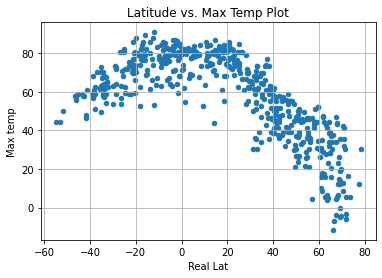

In [76]:
city2_df.plot(kind='scatter', x='Real Lat', y='Max temp')
plt.title("Latitude vs. Max Temp Plot")
plt.grid()
plt.savefig("Lat_temp.png", bbox_inches="tight")

# Observations:
# temperatures peak around the equator (+/- 25 degrees lat)
# seemingly the max temp drops more going north for cities than going south
# which is interesting.  Something else is moderating temps in the southern hemisphere


## Latitude vs. Humidity Plot

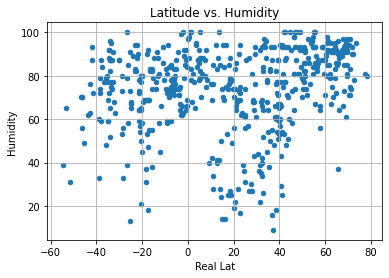

In [77]:
city2_df.plot(kind='scatter', x='Real Lat', y='Humidity')
plt.title("Latitude vs. Humidity")
plt.grid()
plt.savefig("Lat_humidity.png", bbox_inches="tight")

# Observations:
# Humidity does not seem correlated with latitude
# the range of values at <-50 lat, is pretty much the range of values >50 lat 

## Latitude vs. Cloudiness Plot

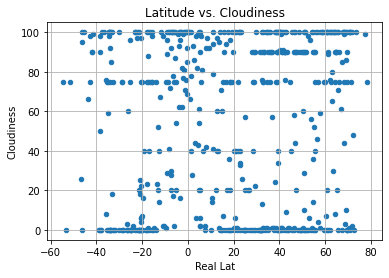

In [79]:
city2_df.plot(kind='scatter', x='Real Lat', y='Cloudiness')
plt.title("Latitude vs. Cloudiness")
plt.grid()
plt.savefig("Lat_Cloudiness.png", bbox_inches="tight")

# Observations:
# Cloudiness doesn't seem correlated to latitude
# maybe a slight bias to higher cloud cover at the extremes in lat
# Quite a range of value per cities of like latitude

## Latitude vs. Wind Speed Plot

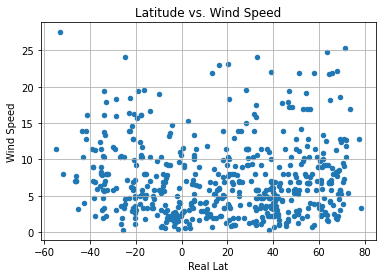

In [80]:
city2_df.plot(kind='scatter', x='Real Lat', y='Wind Speed')
plt.title("Latitude vs. Wind Speed")
plt.grid()
plt.savefig("Lat_Wind.png", bbox_inches="tight")

# Observations:
# Wind Speed doesn't seem correlated to latitude
# a pretty thorough range across all latitudes

## Linear Regression

In [83]:
# Create Northern Hemisphere datatable
north_df = city2_df.loc[city2_df['Real Lat'] >=0]
north_df.head()

,Name,Country,Real Lat,Real Long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
0,goundam,ml,16.41,-3.67,83.46,14.0,0.0,6.08,1603847433
1,praia da vitoria,pt,38.73,-27.07,62.60,72.0,75.0,5.93,1603847434
2,oboyan,ru,51.21,36.28,39.20,80.0,0.0,11.18,1603847436
5,uyemskiy,ru,64.47,40.85,44.60,93.0,90.0,6.71,1603847439
6,khatanga,ru,71.97,102.50,-6.11,90.0,48.0,10.27,1603847295


In [84]:
# Create Southern Hemisphere datatable
south_df = city2_df.loc[city2_df['Real Lat'] <0]
south_df.head()

,Name,Country,Real Lat,Real Long,Max temp,Humidity,Cloudiness,Wind Speed,Date Rec
3,alofi,nu,-19.06,-169.92,78.80,69.0,40.0,19.46,1603847287
9,caravelas,br,-17.71,-39.25,77.18,90.0,100.0,10.54,1603847311
11,hermanus,za,-34.42,19.23,59.00,92.0,100.0,1.99,1603847234
14,hithadhoo,mv,-0.60,73.08,83.93,66.0,85.0,11.01,1603847224
15,itapirapua,br,-15.82,-50.61,76.57,82.0,100.0,1.83,1603847450


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [85]:
# linear regression model
from scipy.stats import linregress

results = linregress(north_df['Max temp'], north_df['Real Lat'])

In [86]:
#regression values:
slope = results.slope
yinter = results.intercept

print(slope, yinter)

-0.76350868623671 78.56709062053426


In [87]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = -0.76x + 78.57


In [88]:
# R^2 value
cor_lat_temp_nor = sts.pearsonr(north_df['Max temp'],north_df['Real Lat'])
cor_lat_temp_nor[0]
r_sqre = cor_lat_temp_nor[0]*cor_lat_temp_nor[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

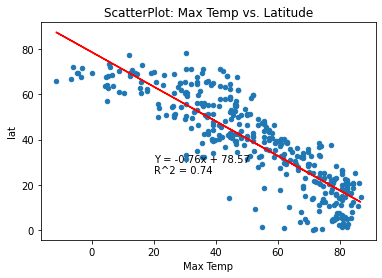

In [89]:
#plot chart with regression line
ax = north_df.plot.scatter(x = 'Max temp', y = 'Real Lat')

ax.set_title('ScatterPlot: Max Temp vs. Latitude')
ax.set_xlabel('Max Temp')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(20,25), xytext=(20,30), fontsize=10)
ax.annotate(reg_form, xy=(20,25), xytext=(20,25), fontsize=10)

x_values = north_df['Max temp']
y_values = north_df['Max temp']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [ ]:
# Linear Regression (Northern temp vs. lat)
# Max temp increases pretty well with distance closer to 0 Latitude
# pretty good regression coefficient for this: R^2 = 0.74

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [90]:
results = linregress(south_df['Max temp'], south_df['Real Lat'])

In [91]:
#regression values:
slope = results.slope
yinter = results.intercept

In [92]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.89x + -83.13


In [93]:
# R^2 value
cor_lat_temp_sth = sts.pearsonr(south_df['Max temp'],south_df['Real Lat'])
cor_lat_temp_sth[0]
r_sqre = cor_lat_temp_sth[0]*cor_lat_temp_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

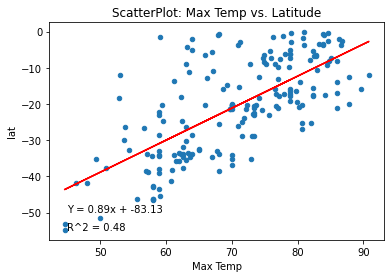

In [94]:
#plot chart with regression line
ax = south_df.plot.scatter(x = 'Max temp', y = 'Real Lat')

ax.set_title('ScatterPlot: Max Temp vs. Latitude')
ax.set_xlabel('Max Temp')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(45,-50), xytext=(45,-50), fontsize=10)
ax.annotate(reg_form, xy=(45,-55), xytext=(45,-55), fontsize=10)

x_values = south_df['Max temp']
y_values = south_df['Max temp']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [95]:
# Linear Regression (temp vs. hemipshere lat)
# confirms that as the latitude is further away from zero
# the temperature drops fairly consistently (similar to moving north away from the 0 Latitude)
# the slope is inverted but the magntidue of the slope is quite similar
# .74 north vs. .89 South

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [96]:
results = linregress(north_df['Humidity'], north_df['Real Lat'])

In [97]:
#regression values:
slope = results.slope
yinter = results.intercept

In [98]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.29x + 17.56


In [99]:
# R^2 value
cor_lat_temp_north = sts.pearsonr(north_df['Humidity'],north_df['Real Lat'])
cor_lat_temp_north[0]
r_sqre = cor_lat_temp_north[0]*cor_lat_temp_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

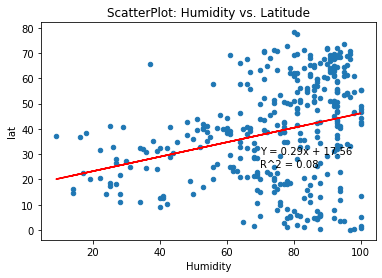

In [100]:
#plot chart with regression line
ax = north_df.plot.scatter(x = 'Humidity', y = 'Real Lat')

ax.set_title('ScatterPlot: Humidity vs. Latitude')
ax.set_xlabel('Humidity')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(70,30), xytext=(70,30), fontsize=10)
ax.annotate(reg_form, xy=(70,25), xytext=(70,25), fontsize=10)

x_values = north_df['Humidity']
y_values = north_df['Humidity']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [113]:
results = linregress(south_df['Humidity'], south_df['Real Lat'])

In [114]:
#regression values:
slope = results.slope
yinter = results.intercept

In [115]:
#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

Regression eq: Y = 0.13x + -29.86


In [116]:
# R^2 value
cor_lat_Humidity_sth = sts.pearsonr(south_df['Humidity'],south_df['Real Lat'])
cor_lat_Humidity_sth[0]
r_sqre = cor_lat_Humidity_sth[0]*cor_lat_Humidity_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

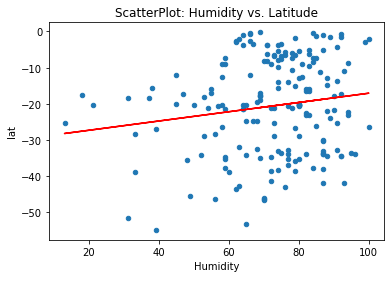

In [117]:
#plot chart with regression line
ax = south_df.plot.scatter(x = 'Humidity', y = 'Real Lat')

ax.set_title('ScatterPlot: Humidity vs. Latitude')
ax.set_xlabel('Humidity')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(25,-65), xytext=(25,-65), fontsize=10)
ax.annotate(reg_form, xy=(25,-70), xytext=(25,-70), fontsize=10)

x_values = south_df['Humidity']
y_values = south_df['Humidity']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [118]:
# Observations:  Humidity vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  .29 (magnitude) slope in the north vs. 0.13 slope in the south
# in general latitude has little value in predicting humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression eq: Y = 0.05x + 36.11


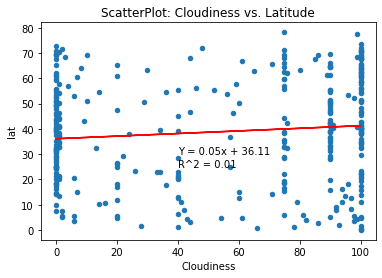

In [119]:
results = linregress(north_df['Cloudiness'], north_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_Cloudiness_north = sts.pearsonr(north_df['Cloudiness'],north_df['Real Lat'])
cor_lat_Cloudiness_north[0]
r_sqre = cor_lat_Cloudiness_north[0]*cor_lat_Cloudiness_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = north_df.plot.scatter(x = 'Cloudiness', y = 'Real Lat')

ax.set_title('ScatterPlot: Cloudiness vs. Latitude')
ax.set_xlabel('Cloudiness')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(40,30), xytext=(40,30), fontsize=10)
ax.annotate(reg_form, xy=(40,25), xytext=(40,25), fontsize=10)

x_values = north_df['Cloudiness']
y_values = north_df['Cloudiness']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression eq: Y = 0.06x + -23.56


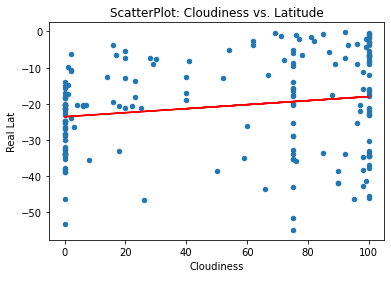

In [120]:
results = linregress(south_df['Cloudiness'], south_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_Cloudiness_sth = sts.pearsonr(south_df['Cloudiness'],south_df['Real Lat'])
cor_lat_Cloudiness_sth[0]
r_sqre = cor_lat_Cloudiness_sth[0]*cor_lat_Cloudiness_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = south_df.plot.scatter(x = 'Cloudiness', y = 'Real Lat')

ax.set_title('ScatterPlot: Cloudiness vs. Latitude')
ax.set_xlabel('Cloudiness')
ax.set_ylabel('Real Lat')


ax.annotate(short_form, xy=(20,-65), xytext=(20,-65), fontsize=10)
ax.annotate(reg_form, xy=(20,-70), xytext=(20,-70), fontsize=10)

x_values = south_df['Cloudiness']
y_values = south_df['Cloudiness']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [121]:
# Observations:  Cloudiness vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  
#.05 (magnitude) slope in the north vs. 0.06 slope in the south is fairly equal
# in general latitude has no relationship with cloudiness

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression eq: Y = 0.64x + 34.35


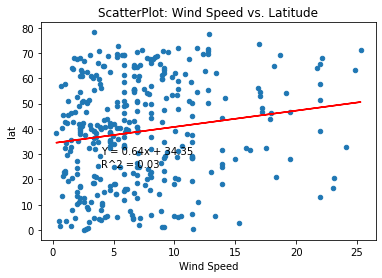

In [122]:
results = linregress(north_df['Wind Speed'], north_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_wind_north = sts.pearsonr(north_df['Wind Speed'],north_df['Real Lat'])
cor_lat_wind_north[0]
r_sqre = cor_lat_wind_north[0]*cor_lat_wind_north[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = north_df.plot.scatter(x = 'Wind Speed', y = 'Real Lat')

ax.set_title('ScatterPlot: Wind Speed vs. Latitude')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(4,30), xytext=(4,30), fontsize=10)
ax.annotate(reg_form, xy=(4,25), xytext=(4,25), fontsize=10)

x_values = north_df['Wind Speed']
y_values = north_df['Wind Speed']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression eq: Y = -0.83x + -14.47


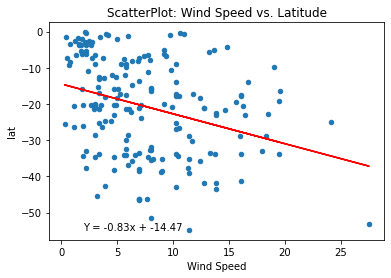

In [123]:
results = linregress(south_df['Wind Speed'], south_df['Real Lat'])

#regression values:
slope = results.slope
yinter = results.intercept

#regression line equation

line_eq = print(f"Regression eq: Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter))
#print(line_eq)

short_form = f"Y = {format('{:.2f}')}x + {format('{:.2f}')}".format(slope,yinter)

# R^2 value
cor_lat_wind_sth = sts.pearsonr(south_df['Wind Speed'],south_df['Real Lat'])
cor_lat_wind_sth[0]
r_sqre = cor_lat_wind_sth[0]*cor_lat_wind_sth[0]
r_sqre

reg_form = f"R^2 = {format('{:.2f}')}".format(r_sqre)

#plot chart with regression line
ax = south_df.plot.scatter(x = 'Wind Speed', y = 'Real Lat')

ax.set_title('ScatterPlot: Wind Speed vs. Latitude')
ax.set_xlabel('Wind Speed')
ax.set_ylabel('lat')


ax.annotate(short_form, xy=(2,-55), xytext=(2,-55), fontsize=10)
ax.annotate(reg_form, xy=(2,-60), xytext=(2,-60), fontsize=10)

x_values = south_df['Wind Speed']
y_values = south_df['Wind Speed']*slope + yinter

plt.plot(x_values, y_values, color='r')

plt.show()

In [112]:
# Observations:  Wind Speed vs. latitude by hemisphere
# NO meaningful R^2 here in either hemisphere.  
#.64 (magnitude) slope in the north is roughly equal the south magnitude 0.83 but the poor fit
# suggests this is not meaningful
# in general latitude has no relationship with Wind Speed